### assumption of linear regression 
* Linear relationship (all the features should have a linear relation with label )
* There should no multicolinearity (there is no relation between the features)
* Normal Residual ()
* Homoscedasticity
* 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

In [3]:
df =pd.read_csv('assumption_of_linearregression_data.csv')

In [4]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [5]:
X = df.iloc[:,0:3]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state= 2)

In [7]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(X_test)

In [9]:
residual = y_test - y_pred

In [10]:
residual

112     8.099103
29     39.526993
182    17.342842
199    -1.301114
193   -12.079235
85     -3.934094
10    -17.986620
54     31.195681
115     1.510592
35    -22.598599
12     -7.072518
92     -0.279274
13      2.825852
126   -11.942761
174    -2.218742
2      -0.275666
44    -26.189809
3      10.867723
113     0.793708
14    -39.015135
23      6.865709
25     32.799804
6      31.224976
134   -17.162416
165    16.159809
173   -43.627786
45     -3.511350
65    -38.142760
48      4.523151
122     9.051253
178    15.764069
64     -0.996184
9      15.180570
57     -8.535844
78    -19.755287
71    -14.497755
128    24.954827
176   -22.311353
131     1.691278
53      7.618761
Name: target, dtype: float64

Text(0.5, 1.0, 'feature3')

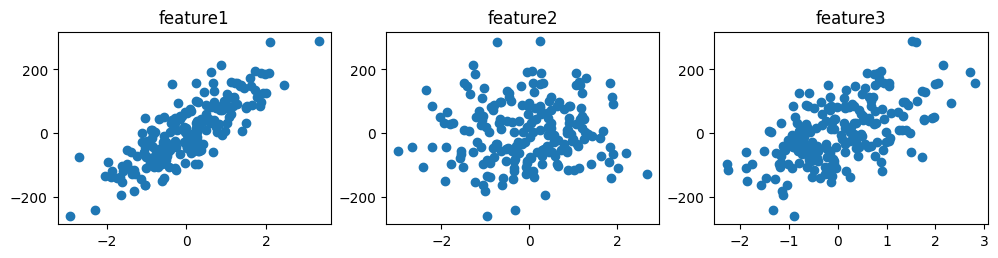

In [12]:
fig , (ax1,ax2,ax3) = plt.subplots(ncols =3,figsize =(12,2.5))
ax1.scatter(df['feature1'],df['target'])
ax1.set_title('feature1')
ax2.scatter(df['feature2'],df['target'])
ax2.set_title('feature2')
ax3.scatter(df['feature3'],df['target'])
ax3.set_title('feature3')

### 2. multicoliearity 

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =[]
for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train,i))

In [15]:
vif

[1.0034818679179152, 1.0052736607332797, 1.0065638547636795]

<Axes: >

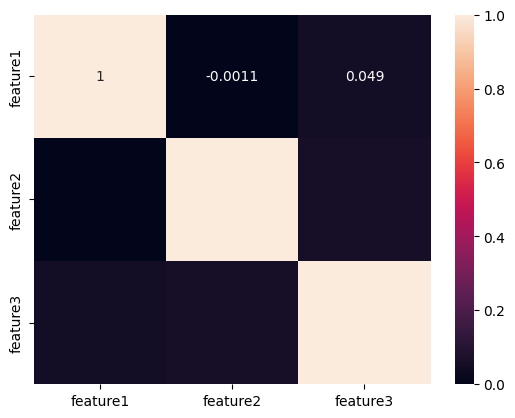

In [16]:
### another techinique 
sns.heatmap(df.iloc[:,0:3].corr(),annot =True)

### Normal residual 
* it should we normal 

/home/anubhav/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


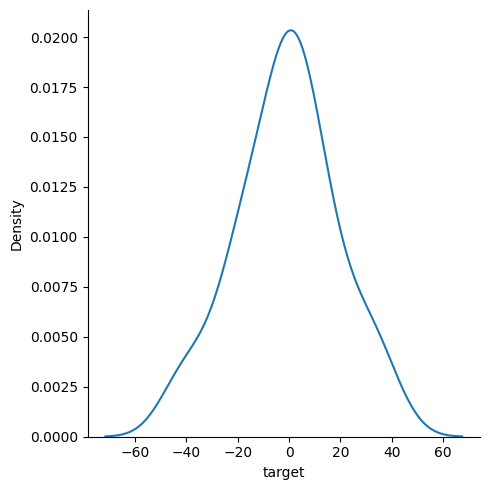

In [19]:
sns.displot(residual,kind = 'kde')

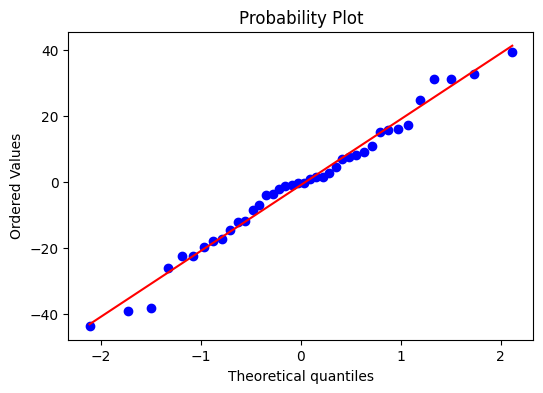

In [21]:
## QQ PLOT (it should overlap )
import scipy as sp 
fig,ax = plt.subplots(figsize =(6,4))
sp.stats.probplot(residual,plot =ax ,fit =True)
plt.show()

### Homoscedasticity
* having the same scatter

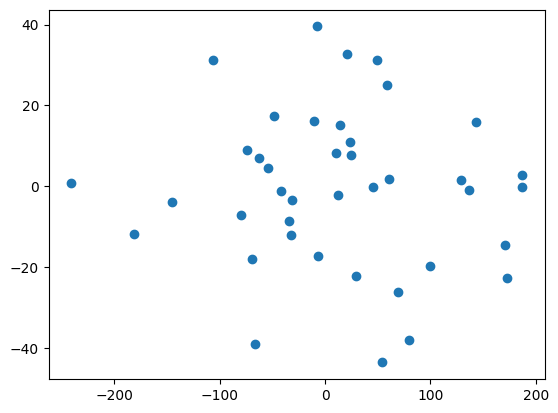

In [25]:
plt.scatter(y_pred,residual)

### No Autocorrelation
* no pattern should we form 

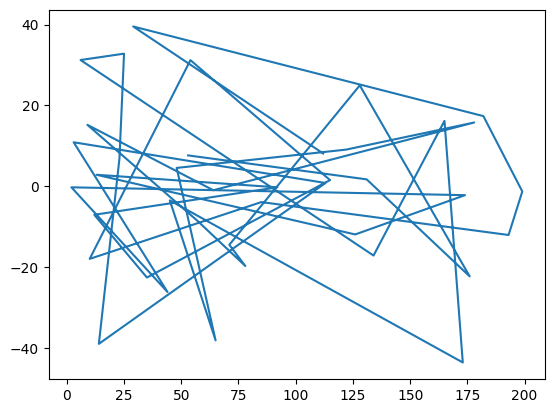

In [26]:
plt.plot(residual)